# **Limpieza  y Exploración Base de datos** 
Durante el seminario de exploración de datos dirigido por el profesor Santiago Echeverry para el semillero GEA, se propuso como actividad inicial la creación de una base de datos compuesta por varias tablas. En esta segunda actividad, se llevó a cabo la limpieza de datos de la tabla **Víctimas de Acciones Bélicas** y de la tabla **Casos de Acciones Bélicas**, para posteriormente cargarla en el gestor de bases de datos PostgreSQL.


In [4]:
import pandas as pd
import numpy as np

victimasAB_df = pd.read_excel('C:\\Users\\Usuario\\Downloads\\GEA\\sara\\VictimasAB_202309.xlsx')
casosAB_df = pd.read_excel('C:\\Users\\Usuario\\Downloads\\GEA\\sara\\CasosAB_202309.xlsx')

c:\Users\Usuario\Downloads\GEA\Sara\.env\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Inicialmente, se llevó a cabo una descripción de los atributos asociados a la entidades **VíctimasAB** y **CasosAB** con el objetivo de identificar los tipos de datos manejados y comprender su comportamiento en la base de datos. Para ello, se exportaron los datos y se empleó la función **info()** para realizar una exploración inicial. Esta exploración permitió visualizar la cantidad de variables y registros presentes, así como la cantidad de datos no faltantes por columna y el tipo de dato manejado por cada atributo. Es importante destacar que, por razones de practicidad en el código, se modificaron los nombres de algunas variables para facilitar su manejo.


### **Tabla 1: Víctimas de Acciones Bélicas**
La tabla **Víctimas de Acciones Bélicas** (nombre de archivo *victimasAB_df*) consta de **18 atributos** que han sido previamente descritos, y contiene un total de **49363 registros**.


### **Tabla 2: Casos de Acciones Bélicas**
La tabla **Casos de Acciones Bélicas** (nombre de archivo *casosAB_df*) consta de **40 atributos**, previamente descritos, y contiene un total de **37532 registros**.
Los tipos de datos encontrados fueron: float64(2), int64(22), object(16).
Se encontraron **10 atributos** con presencia de datos faltantes.

### *Renombramiento del nombre de las columnas*

In [17]:
victimasAB_df.rename(columns={  'ID Caso':'id_caso', 
                              'Código DANE de Municipio':'cod_dane_mun',
                              'Municipio':'municipio',
                              'Departamento':'departamentos',
                              'Año':'anho',
                              'Mes':'mes',
                              'Día':'dia',
                              'ID Persona':'id_persona',
                              'Sexo':'sexo',
                              'Etnia':'etnia',
                              'Ocupación':'ocupacion',
                              'Calidad de la Víctima o la Baja':'cal_vict_baja',
                              'Tipo de Población Vulnerable':'tipo_pob_vuln',
                              'Fuerza o Grupo Armado Organizado al que Pertenece el Combatiente':'fuerza_grupo_arm',
                              'Descripción Fuerza o Grupo Armado Organizado al que Pertenece el Combatiente':'desc_fuerza_arm',
                              'Edad':'edad',
                              'Latitud':'latitud',
                              'Longitud':'longitud'},inplace=True)

In [19]:
casosAB_df.rename(columns={'ID Caso':'id_caso',
                           'ID Caso Relacionado':'id_caso_rela',
                           'Año':'anho',
                           'Mes':'mes',
                           'Día':'dia',
                           'Código DANE de Municipio':'cod_dane_mun',
                           'Municipio':'municipio',
                           'Departamento':'departamento',
                           'Región':'region',
                           'Modalidad':'modalidad',
                           'Iniciativa':'inicitiva',
                           'Tipo de Unidad Atacada':'tipo_uni_ata',
                           'Grupo Armado 1':'grupo_arm_1',
                           'Descripción Grupo Armado 1':'des_grupo_arm_1',
                           'Grupo Armado 2':'grupo_arm_2',
                           'Descripción Grupo Armado 2':'des_grupo_arm_2',
                           'Grupo Armado 3':'grupo_arm_3',
                           'Descripción Grupo Armado 3':'des_grupo_arm_3',
                           'Lesionados Civiles':'lesionados_civiles',
                           'Grupo al que Pertenecen los Capturados':'grupo_capturados',
                           'Capturados':'capturados',
                           'Lesionados Combatientes':'lensionados_combatientes',
                           'Militares':'militares',
                           'Policías':'policia',
                           'Otras Fuerzas Armadas Estatales':'otras_fuerzas_a',
                           'Agentes_del_Estado_Sin_Información':'agen_est_no_inf',
                           'Total_Agentes_del_Estado':'total_agen_est',
                           'Guerrilleros':'guerilleros',
                           'Paramilitares':'paramilitares',
                           'Grupos_Posdesmovilización':'grupos_posdesmo', 
                           'Combatientes_Sin_Información':'combatientes_no_inf',
                           'Otros Grupos Armados Organizados':'otros_grupos_armados_o',
                           'Total Combatientes de Grupos Armados Organizados':'total_combatientes_ga',	
                           'Total Combatientes':'total_combatientes',	
                           'Personas Sin Información':'persona_sinf',
                           'Total Civiles':'total_civiles',	
                           'Ventaja Militar':'ventaja_militar',	
                           'Total de Víctimas del Caso':'total_victimas_caso',
                           'Latitud':'latitud',
                           'Longitud':'longitud'},inplace=True)

### *Primer analisis exploratorio*

#### **Tabla 1: Víctimas de Acciones Bélicas**

In [65]:
victimasAB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49363 entries, 0 to 49362
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_caso           49363 non-null  int64  
 1   cod_dane_mun      49363 non-null  object 
 2   municipio         49363 non-null  object 
 3   departamentos     49363 non-null  object 
 4   anho              49363 non-null  int64  
 5   mes               49363 non-null  int64  
 6   dia               49363 non-null  int64  
 7   id_persona        49363 non-null  int64  
 8   sexo              49363 non-null  object 
 9   etnia             177 non-null    object 
 10  ocupacion         49363 non-null  object 
 11  cal_vict_baja     49363 non-null  object 
 12  tipo_pob_vuln     202 non-null    object 
 13  fuerza_grupo_arm  45065 non-null  object 
 14  desc_fuerza_arm   45065 non-null  object 
 15  edad              3190 non-null   object 
 16  latitud           49363 non-null  float6

#### **Tabla 2: Casos de Acciones Bélicas**

In [66]:
casosAB_df[casosAB_df.columns[0:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37532 entries, 0 to 37531
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_caso             37532 non-null  int64 
 1   id_caso_rela        4136 non-null   object
 2   anho                37532 non-null  int64 
 3   mes                 37532 non-null  int64 
 4   dia                 37532 non-null  int64 
 5   cod_dane_mun        37532 non-null  object
 6   municipio           37532 non-null  object
 7   departamento        37532 non-null  object
 8   region              36930 non-null  object
 9   modalidad           37532 non-null  object
 10  inicitiva           37532 non-null  object
 11  tipo_uni_ata        37492 non-null  object
 12  grupo_arm_1         37531 non-null  object
 13  des_grupo_arm_1     37516 non-null  object
 14  grupo_arm_2         37531 non-null  object
 15  des_grupo_arm_2     37531 non-null  object
 16  grupo_arm_3         92

In [64]:
casosAB_df[casosAB_df.columns[20:41]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37532 entries, 0 to 37531
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   capturados                          37532 non-null  int64  
 1   lensionados_combatientes            37532 non-null  int64  
 2   militares                           37532 non-null  int64  
 3   policia                             37532 non-null  int64  
 4   otras_fuerzas_a                     37532 non-null  int64  
 5   Agentes del Estado Sin Información  37532 non-null  int64  
 6   Total Agentes del Estado            37532 non-null  int64  
 7   guerilleros                         37532 non-null  int64  
 8   paramilitares                       37532 non-null  int64  
 9   Grupos Posdesmovilización           37532 non-null  int64  
 10  Combatientes Sin Información        37532 non-null  int64  
 11  otros_grupos_armados_o              37532

### *Descripción Variables*

#### **Tabla 1: Víctimas de Acciones Bélicas**

1. `id_caso`: Identificador único del caso.
2. `cod_dane_mun`: Código DANE del municipio donde ocurrió la acción bélica.
3. `municipio`: Nombre del municipio donde ocurrió la acción bélica.
4. `departamentos`: Departamento donde ocurrió la acción bélica.
5. `anho`: Año en que ocurrió la acción bélica.
6. `mes`: Mes en que ocurrió la acción bélica.
7. `dia`: Día en que ocurrió la acción bélica.
8. `id_persona`: Identificador único de la persona afectada.
9. `sexo`: Género de la persona afectada (HOMBRE, MUJER, SIN INFORMACIÓN).
10. `etnia`: Etnia de la persona afectada. (INDIGENA,[NEGRO(A), MULATO(A), AFRODESCENDIENTE, AFROCOLOMBIANO(A)],[NINGÚN GRUPO ÉTNICO,RAIZAL DEL ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA])
11. `ocupacion`: Ocupación de la persona afectada (GUERRILLERO, FUERZA PÚBLICA, CAMPESINO, entre otras)
12. `cal_vict_baja`: Calidad de la víctima o baja (COMBATIENTE, CIVIL).
13. `tipo_pob_vuln`: Tipo de población vulnerable al que pertenece la persona afectada.
14. `fuerza_grupo_arm`: Fuerza o grupo armado al que pertenece el combatiente.
15. `desc_fuerza_arm`: Descripción de la fuerza o grupo armado al que pertenece el combatiente.
16. `edad`: Edad de la persona afectada.
17. `latitud`: Coordenada de latitud donde ocurrió la acción bélica.
18. `longitud`: Coordenada de longitud donde ocurrió la acción bélica.

In [20]:
victimasAB_df.groupby('municipio').size().sort_values(ascending=False).head(10)

municipio
SIN INFORMACION           1456
MEDELLIN                   870
TAME                       761
ARAUQUITA                  588
VISTAHERMOSA               532
ITUANGO                    500
BOGOTA, D.C.               489
SAN VICENTE DEL CAGUAN     486
PUERTO RICO                473
TURBO                      467
dtype: int64

In [ ]:
victimasAB_df.groupby('departamentos').size().sort_values(ascending=False).head(10)

departamentos
ANTIOQUIA             10000
META                   3401
CAUCA                  2969
SANTANDER              2922
VALLE DEL CAUCA        2450
NORTE DE SANTANDER     2389
CAQUETA                2343
ARAUCA                 2227
TOLIMA                 2161
HUILA                  1712
dtype: int64

In [ ]:
victimasAB_df.groupby('sexo').size().sort_values(ascending=False)

sexo
HOMBRE             30100
SIN INFORMACION    17972
MUJER               1291
dtype: int64

In [ ]:
victimasAB_df.groupby('etnia').size().sort_values(ascending=False)

etnia
INDÍGENA                                                               120
NEGRO(A), MULATO(A), AFRODESCENDIENTE, AFROCOLOMBIANO(A)                53
NINGÚN GRUPO ÉTNICO                                                      2
RAIZAL DEL ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA      2
dtype: int64

In [ ]:
victimasAB_df.groupby('ocupacion').size().sort_values(ascending=False).head(10)

ocupacion
GUERRILLERO                            24864
FUERZA PÚBLICA                         14991
SIN INFORMACIÓN                         3773
PARAMILITAR                             2382
BANDOLERO                                755
OTRA ¿CUÁL?                              634
MIEMBRO DE GRUPO POSDESMOVILIZACIÓN      512
CAMPESINO                                247
DELINCUENTE                              169
TRABAJADOR DE FINCA                      130
dtype: int64

In [ ]:
victimasAB_df.groupby('cal_vict_baja').size().sort_values(ascending=False)

cal_vict_baja
COMBATIENTE        45080
CIVIL               3953
SIN INFORMACIÓN      330
dtype: int64

In [ ]:
victimasAB_df.groupby('tipo_pob_vuln').size().sort_values(ascending=False).head(10)

tipo_pob_vuln
OTRA ¿CUÁL?                       32
FAMILIAR DE COMBATIENTE           26
EXMILITAR                         18
FUNCIONARIO JUDICIAL              16
DESMOVILIZADO                     15
MAESTRO O EDUCADOR                13
FAMILIAR DE PERSONA VULNERABLE    12
LÍDER COMUNITARIO                 11
MILITANTE POLÍTICO                10
EXPOLICÍA                          8
dtype: int64

In [ ]:
victimasAB_df.groupby('fuerza_grupo_arm').size().sort_values(ascending=False).head(10)

fuerza_grupo_arm
GUERRILLA                       24935
AGENTE DEL ESTADO               14941
GRUPO PARAMILITAR                2412
BANDOLERISMO                     1196
DESCONOCIDO                       653
GRUPO POSDESMOVILIZACIÓN          509
GRUPO ARMADO NO IDENTIFICADO      258
AGENTE EXTRANJERO                  98
GRUPO ARMADO NO DIRIMIDO           27
OTRO ¿CUÁL?                        19
dtype: int64

In [ ]:
victimasAB_df.groupby('desc_fuerza_arm').size().sort_values(ascending=False).head(10)

desc_fuerza_arm
FARC                                   15330
EJÉRCITO NACIONAL                       9410
ELN                                     5256
POLICÍA NACIONAL                        4954
NO IDENTIFICADO                         1673
AUTODEFENSAS UNIDAS DE COLOMBIA AUC     1473
NO IDENTIFICADA                         1036
NO APLICA                                942
EPL                                      778
M19                                      734
dtype: int64

In [26]:
victimasAB_df.groupby('edad').size().sort_values(ascending=False)

edad
JUVENTUD (18-28 AÑOS)            1680
ADULTEZ (29-59 AÑOS)              976
ADOLESCENCIA (12-17 AÑOS)         295
INFANCIA (6-11 AÑOS)               97
PERSONA MAYOR (60 AÑOS O MAS)      75
PRIMERA INFANCIA (0-5 AÑOS)        67
dtype: int64


#### **Tabla 2: Casos de Acciones Bélicas**

1. `id_caso`: Identificador único del caso.
2. `id_caso_rela`: Identificador único del caso relacionado.
3. `anho`: Año en que ocurrió el caso.
4. `mes`: Mes en que ocurrió el caso.
5. `dia`: Día en que ocurrió el caso.
6. `cod_dane_mun`: Código DANE del municipio donde ocurrió el caso.
7. `municipio`: Nombre del municipio donde ocurrió el caso.
8. `departamento`: Departamento donde ocurrió el caso.
9. `region`: Región donde ocurrió el caso.
10. `modalidad`: Modalidad del caso.
11. `inicitiva`: Iniciativa del caso.
12. `tipo_uni_ata`: Tipo de unidad atacada en el caso.
13. `grupo_arm_1`: Grupo armado principal involucrado en el caso.
14. `des_grupo_arm_1`: Descripción del grupo armado principal.
15. `grupo_arm_2`: Segundo grupo armado involucrado en el caso.
16. `des_grupo_arm_2`: Descripción del segundo grupo armado.
17. `grupo_arm_3`: Tercer grupo armado involucrado en el caso.
18. `des_grupo_arm_3`: Descripción del tercer grupo armado.
19. `lesionados_civiles`: Número de civiles lesionados en el caso.
20. `grupo_capturados`: Grupo al que pertenecen los capturados en el caso.
21. `capturados`: Número de personas capturadas en el caso.
22. `lensionados_combatientes`: Número de combatientes lesionados en el caso.
23. `militares`: Número de militares afectados en el caso.
24. `policia`: Número de policías afectados en el caso.
25. `otras_fuerzas_a`: Número de otras fuerzas armadas estatales afectadas en el caso.
26. `agen_est_no_inf`: Número de agentes del estado sin información en el caso.
27. `total_agen_est`: Total de agentes del estado en el caso.
28. `guerilleros`: Número de guerrilleros afectados en el caso.
29. `paramilitares`: Número de paramilitares afectados en el caso.
30. `grupos_posdesmo`: Número de grupos posdesmovilización afectados en el caso.
31. `combatientes_no_inf`: Número de combatientes sin información en el caso.
32. `otros_grupos_armados_o`: Número de otros grupos armados organizados afectados en el caso.
33. `total_combatientes_ga`: Total de combatientes de grupos armados organizados involucrados en el caso.
34. `total_combatientes`: Total de combatientes involucrados en el caso.
35. `persona_sinf`: Número de personas sin información en el caso.
36. `total_civiles`: Total de civiles afectados en el caso.
37. `ventaja_militar`: Indicador de si hubo ventaja militar en el caso.
38. `total_victimas_caso`: Total de víctimas en el caso.
39. `latitud`: Coordenada de latitud donde ocurrió el caso.
40. `longitud`: Coordenada de longitud donde ocurrió el caso.

### *Valores faltantes*

Existen diversos tipos de datos faltantes en la información. Por un lado tenemos para los campos de municipio, sexo, tipo de víctima, entre otros donde encontramos registros con la etiqueta "SIN INFORMACIÓN". Asimismo, en los campos correspondientes a año, mes y día, encontramos registros con valores como "0000" y "00" (que Python interpreta únicamente como 0). Además, hay registros que están completamente en blanco, lo que conocemos como valores NA o NULL. 
**Este analisis aplica para ambas tablas. 

#### **Tabla 1: Víctimas de Acciones Bélicas**

Se han registrado un total de **153116 datos faltantes**. Al analizar los registros, observamos que todos ellos tienen al menos un dato faltante.

In [8]:
registros_na = victimasAB_df.isna().any(axis=1).sum() 
print(registros_na)

49363


In [9]:
print(victimasAB_df.isna().sum().sum())

153116


In [10]:
proporcion_na_por_columna = (victimasAB_df.isna().sum(axis=0))/(victimasAB_df.shape[0])
print(proporcion_na_por_columna)

ID Caso                                                                         0.000000
Código DANE de Municipio                                                        0.000000
Municipio                                                                       0.000000
Departamento                                                                    0.000000
Año                                                                             0.000000
Mes                                                                             0.000000
Día                                                                             0.000000
ID Persona                                                                      0.000000
Sexo                                                                            0.000000
Etnia                                                                           0.996414
Ocupación                                                                       0.000000
Calidad de la Víctima

Vamos a unificar el formato de tipo de datos faltante, es decir, pasaremos  todos los datos NaN (dato faltante de pandas) a None(datos faltante de python). 

In [11]:
def convertir_nan_a_none(df):
    """
    Convierte los valores 'NaN' a 'None' en un DataFrame de Pandas, pero conserva los valores numéricos.

    Parámetros:
        df (DataFrame): El DataFrame de Pandas a analizar y modificar.

    Retorna:
        DataFrame: Un nuevo DataFrame con los valores 'NaN' convertidos a 'None' en las columnas de tipo cadena.
    """
    df_modificado = df.copy()
    columnas_cadena = df_modificado.select_dtypes(include=['object']).columns

    for columna in columnas_cadena:
        df_modificado[columna] = df_modificado[columna].where(df_modificado[columna].notna(), None)
    
    return df_modificado

In [12]:
victimasAB_df1 = convertir_nan_a_none(victimasAB_df)
print(victimasAB_df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49363 entries, 0 to 49362
Data columns (total 18 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   ID Caso                                                                       49363 non-null  int64  
 1   Código DANE de Municipio                                                      49363 non-null  object 
 2   Municipio                                                                     49363 non-null  object 
 3   Departamento                                                                  49363 non-null  object 
 4   Año                                                                           49363 non-null  int64  
 5   Mes                                                                           49363 non-null  int64  
 6   Día                           

#### **Tabla 2: Casos de Acciones Bélicas**

In [13]:
registros_na = casosAB_df.isna().any(axis=1).sum() 
print(registros_na)

37525


In [14]:
print(casosAB_df.isna().sum().sum())

142187


In [15]:
proporcion_na_por_columna = (casosAB_df.isna().sum(axis=0))/(casosAB_df.shape[0])
print(proporcion_na_por_columna.head(20))

ID Caso                                   0.000000
ID Caso Relacionado                       0.889801
Año                                       0.000000
Mes                                       0.000000
Día                                       0.000000
Código DANE de Municipio                  0.000000
Municipio                                 0.000000
Departamento                              0.000000
Región                                    0.016040
Modalidad                                 0.000000
Iniciativa                                0.000000
Tipo de Unidad Atacada                    0.001066
Grupo Armado 1                            0.000027
Descripción Grupo Armado 1                0.000426
Grupo Armado 2                            0.000027
Descripción Grupo Armado 2                0.000027
Grupo Armado 3                            0.975301
Descripción Grupo Armado 3                0.975301
Lesionados Civiles                        0.000000
Grupo al que Pertenecen los Cap

In [75]:
casosAB_df1 = convertir_nan_a_none(casosAB_df)
print(casosAB_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37532 entries, 0 to 37531
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id_caso                             37532 non-null  int64  
 1   id_caso_rela                        4136 non-null   object 
 2   anho                                37532 non-null  int64  
 3   mes                                 37532 non-null  int64  
 4   dia                                 37532 non-null  int64  
 5   cod_dane_mun                        37532 non-null  object 
 6   municipio                           37532 non-null  object 
 7   departamento                        37532 non-null  object 
 8   region                              36930 non-null  object 
 9   modalidad                           37532 non-null  object 
 10  inicitiva                           37532 non-null  object 
 11  tipo_uni_ata                        37492

### *Resolviendo preguntas con la base de datos*

1. ¿Cuántas acciones bélicas ocurrieron en cada municipio y departamento?
2. ¿Cuál fue el año con mayor número de acciones bélicas?
3. ¿Cuántas víctimas hubo en total y cuántas fueron hombres y mujeres?
4. ¿Cuál es la distribución de edad de las víctimas?
5. ¿Cuál es el grupo étnico más afectado por las acciones bélicas?
6. ¿Cuál es la ocupación más común entre las víctimas?
7. ¿Cuál es la distribución de género en cada grupo étnico?
8. ¿Qué tipo de población vulnerable fue más afectada por las acciones bélicas?
9. ¿Cuál fue el grupo armado más activo y en qué áreas?
10. ¿Hay alguna tendencia temporal en el número de acciones bélicas?
11. ¿Cuál es la distribución geográfica de las acciones bélicas?
12. ¿Existe alguna relación entre la edad de las víctimas y el tipo de población vulnerable al que pertenecen?
13. ¿Cuál es la relación entre la ocupación de las víctimas y la fuerza o grupo armado al que pertenecen?
14. ¿Hay alguna correlación entre la calidad de la víctima y la descripción de la fuerza o grupo armado al que pertenecen?


#### **Pregunta 1: ¿Cuántas acciones bélicas ocurrieron en cada municipio y departamento?**
En nuestra base de datos, contamos con numerosos municipios. Por ende, para abordar esta pregunta, nos enfocaremos en los 10 municipios con mayor cantidad de víctimas de acciones bélicas, clasificados por municipio y departamento. Presentaremos los resultados a través de una tabla y un gráfico de frecuencias.

Destacamos que, entre los resultados, la ciudad de Medellín, ubicada en el departamento de Antioquia, registra el mayor número de victimas, con un total de 870 registros. Además, observamos que Antioquia es el departamento más recurrente en el top 10.

In [42]:
acciones_por_municipio_departamento = victimasAB_df.groupby(['municipio', 'departamentos']).size().sort_values(ascending=False).reset_index(name='Numero_de_Acciones').head(10)
print(acciones_por_municipio_departamento)

                municipio    departamentos  Numero_de_Acciones
0                MEDELLIN        ANTIOQUIA                 870
1                    TAME           ARAUCA                 761
2               ARAUQUITA           ARAUCA                 588
3            VISTAHERMOSA             META                 532
4                 ITUANGO        ANTIOQUIA                 500
5            BOGOTA, D.C.    BOGOTA, D. C.                 489
6  SAN VICENTE DEL CAGUAN          CAQUETA                 486
7                   TURBO        ANTIOQUIA                 467
8                    CALI  VALLE DEL CAUCA                 412
9                   URIBE             META                 411


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13440\3840193567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Numero_de_Acciones', y='municipio', data=acciones_por_municipio_departamento, palette='viridis')


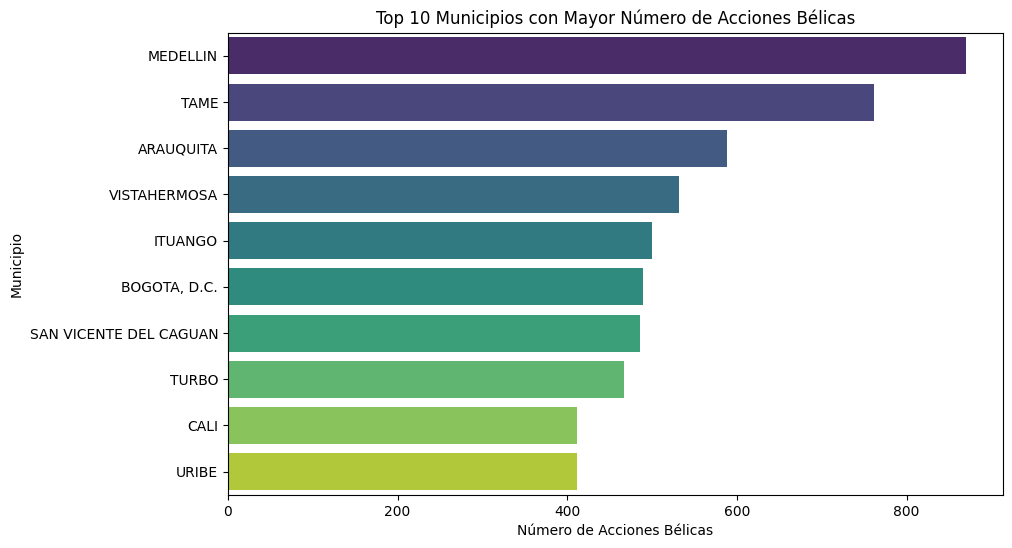

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Numero_de_Acciones', y='municipio', data=acciones_por_municipio_departamento, palette='viridis')
plt.xlabel('Número de Acciones Bélicas')
plt.ylabel('Municipio')
plt.title('Top 10 Municipios con Mayor Número de Acciones Bélicas')
plt.show()


#### **Pregunta 2 : ¿Cuál fue el año con mayor número de acciones bélicas?**
El año con el mayor número de acciones bélicas fue 2002, con un total de 4553 casos de víctimas registrados. Sin embargo, al realizar un análisis más detallado, se observa que el intervalo de tiempo comprendido entre 2001 y 2003 exhibió el pico más alto de reportes.

In [39]:
acciones_por_año = victimasAB_df.groupby('anho').size().sort_values(ascending=False).reset_index(name='Numero_de_Acciones')
print(acciones_por_año)

    anho  Numero_de_Acciones
0   2002                4553
1   2003                3742
2   2001                3595
3   2000                1916
4   1992                1784
..   ...                 ...
62  1967                  67
63  1980                  63
64  1976                  60
65  2016                  59
66  1978                  48

[67 rows x 2 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13440\350714303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='anho', y='Numero_de_Acciones', data=acciones_por_año, palette='viridis')


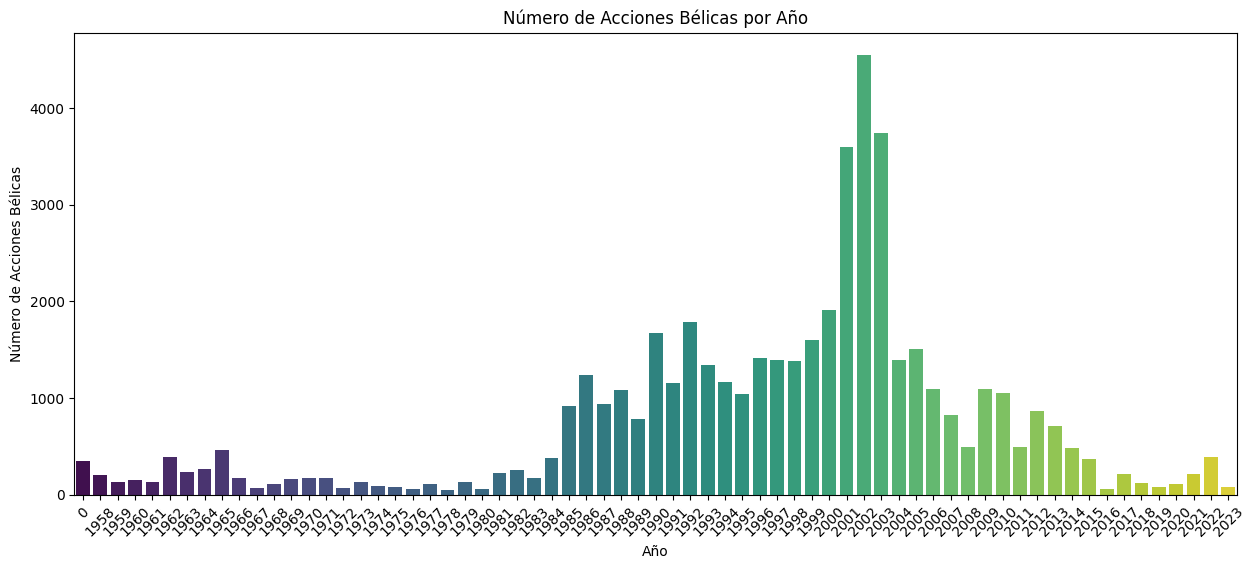

In [41]:
plt.figure(figsize=(15, 6))
sns.barplot(x='anho', y='Numero_de_Acciones', data=acciones_por_año, palette='viridis')
plt.xlabel('Año')
plt.ylabel('Número de Acciones Bélicas')
plt.title('Número de Acciones Bélicas por Año')
plt.xticks(rotation=45)
plt.show()


#### **Pregunta 3 : ¿Cuántas víctimas hubo en total y cuántas fueron hombres y mujeres?**
En total, contamos con 49,363 víctimas, de las cuales 30,100 son hombres y 1,291 son mujeres. Incluso si ignoramos los datos faltantes en los registros (identificados como "SIN INFORMACIÓN"), se observa que la proporción indica que los hombres son los más afectados por esta forma de violencia.

In [51]:
victimas_por_genero = victimasAB_df.groupby('sexo').size().reset_index(name='Numero_de_Victimas')
print(victimas_por_genero)

              sexo  Numero_de_Victimas
0           HOMBRE               30100
1            MUJER                1291
2  SIN INFORMACION               17972


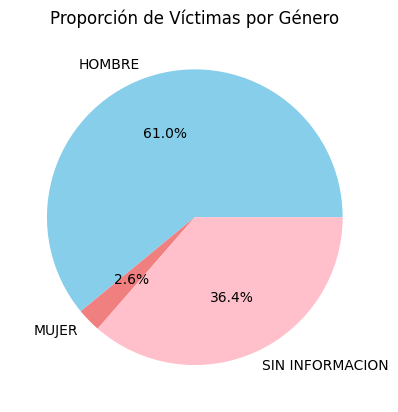

In [49]:
victimas_por_genero = victimasAB_df.groupby('sexo').size().reset_index(name='Numero_de_Victimas')
plt.pie(victimas_por_genero['Numero_de_Victimas'], labels=victimas_por_genero['sexo'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral','pink'])
plt.title('Proporción de Víctimas por Género')
plt.show()

si omitieramos los datos faltes para este caso tendriamos, el siguiente grafico 

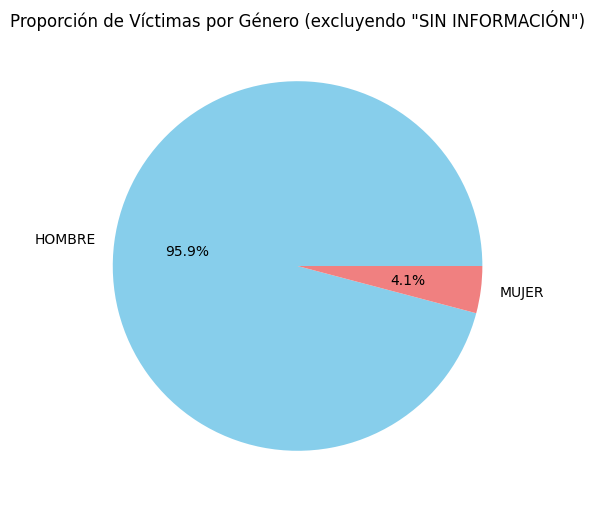

In [50]:
victimas_filtradas = victimasAB_df[victimasAB_df['sexo'] != 'SIN INFORMACION']
victimas_por_genero = victimas_filtradas.groupby('sexo').size()
plt.figure(figsize=(8, 6))
plt.pie(victimas_por_genero, labels=victimas_por_genero.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Género (excluyendo "SIN INFORMACIÓN")')
plt.show()

### *Exportación de la base de datos*

Inicialmente, en la depuración de la base de datos, no se llevaron a cabo eliminaciones de registros o atributos. Esto realizado bajo el concepto de que la información eliminada podría ser de interés según el objetivo de la investigación, asi pues, se optó por una modalidad sencilla de limpieza de datos. Esto consistió en ajustar los nombres de las variables, eliminar datos atípicos (outliers), unificar el tipo de dato faltante (configurando todos al tipo None de Python) y, finalmente, eliminar caracteres especiales.

In [43]:
victimasAB_df.to_csv('VictimasAB.csv', index=False)